In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_csv("../../test.csv")
train = pd.read_csv("../../train.csv")
val = pd.read_csv("../../val.csv")

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         17 non-null     int64  
 1   Alcohol                       17 non-null     float64
 2   Malic acid                    17 non-null     float64
 3   Ash                           17 non-null     float64
 4   Alcalinity of ash             17 non-null     float64
 5   Magnesium                     17 non-null     int64  
 6   Total phenols                 17 non-null     float64
 7   Flavanoids                    17 non-null     float64
 8   Nonflavanoid phenols          17 non-null     float64
 9   Proanthocyanins               17 non-null     float64
 10  Color intensity               17 non-null     float64
 11  Hue                           17 non-null     float64
 12  OD280/OD315 of diluted wines  17 non-null     float64
 13  Proline

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       95 non-null     float64
 1   Malic acid                    95 non-null     float64
 2   Ash                           95 non-null     float64
 3   Alcalinity of ash             95 non-null     float64
 4   Magnesium                     95 non-null     int64  
 5   Total phenols                 95 non-null     float64
 6   Flavanoids                    95 non-null     float64
 7   Nonflavanoid phenols          95 non-null     float64
 8   Proanthocyanins               95 non-null     float64
 9   Color intensity               95 non-null     float64
 10  Hue                           95 non-null     float64
 11  OD280/OD315 of diluted wines  95 non-null     float64
 12  Proline                       95 non-null     int64  
dtypes: floa

In [5]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       17 non-null     float64
 1   Malic acid                    17 non-null     float64
 2   Ash                           17 non-null     float64
 3   Alcalinity of ash             17 non-null     float64
 4   Magnesium                     17 non-null     int64  
 5   Total phenols                 17 non-null     float64
 6   Flavanoids                    17 non-null     float64
 7   Nonflavanoid phenols          17 non-null     float64
 8   Proanthocyanins               17 non-null     float64
 9   Color intensity               17 non-null     float64
 10  Hue                           17 non-null     float64
 11  OD280/OD315 of diluted wines  17 non-null     float64
 12  Proline                       17 non-null     int64  
dtypes: floa

Test zawiera dodatkową kolumnę z klasą, gdzie 0 oznacza inliery, a 1 outliery.

In [6]:
train

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.300000,0.88,2.42,488
1,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.520000,0.56,1.51,675
2,12.58,1.29,2.10,20.0,103,1.48,0.58,0.53,1.40,7.600000,0.58,1.55,640
3,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.680000,1.12,3.48,510
4,13.84,4.12,2.38,19.5,89,1.80,0.83,0.48,1.56,9.010000,0.57,1.64,480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,12.84,2.96,2.61,24.0,101,2.32,0.60,0.53,0.81,4.920000,0.89,2.15,590
91,12.70,3.87,2.40,23.0,101,2.83,2.55,0.43,1.95,2.570000,1.19,3.13,463
92,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470
93,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.400000,0.74,1.42,530


In [7]:
test

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750
1,0,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278
2,0,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520
3,0,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
4,0,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625
5,0,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415
6,0,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510
7,0,11.87,4.31,2.39,21.0,82,2.86,3.03,0.21,2.91,2.80,0.75,3.64,380
8,0,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600
9,0,12.87,4.61,2.48,21.5,86,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625


W zbiorze testowym mamy 5 outlierów na 17 obserwacji.

In [8]:
val

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
1,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
2,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685
3,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660
4,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845
5,13.78,2.76,2.30,22.0,90,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615
6,13.52,3.17,2.72,23.5,97,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520
7,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
8,13.48,1.81,2.41,20.5,100,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920
9,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345


In [9]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=1)
gmm.fit(train)

GaussianMixture()

Narysujmy teraz histogramy w celu wyznaczenia granicy od której będziemy uznawać obserwacje za outliery.

Najpierw dla zbioru treningowego:

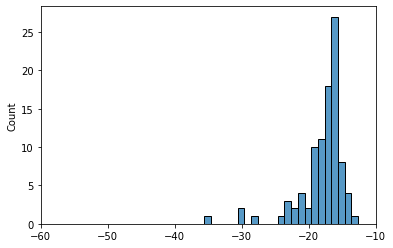

In [10]:
score_train = gmm.score_samples(train)
hist_train = sns.histplot(score_train, binwidth=1)
hist_train.set(xlim=(-60, -10))
plt.show()

A następnie dla zbioru walidacyjnego:

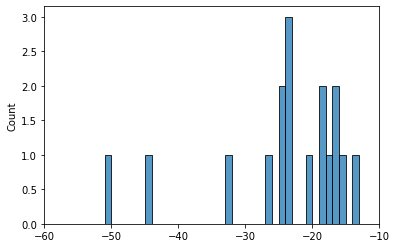

In [11]:
score_val = gmm.score_samples(val)
hist_val = sns.histplot(score_val, binwidth=1)
hist_val.set(xlim=(-60, -10))
plt.show()

W obu przypadkach zdecydowana większość obserwacji uzyskała wynik z przedziału -30 - -10. Na zbiorze treningowym widać dodatkowo jeszcze jedną obserwację, która bliżej jest potencjalnych outelierów niż reszty obserwacji. Ustalmy więc wstępnie threshold na poziomie -27, tak aby ta obserwacja także została uznana za outlier.

Sprawdźmy teraz nasz wynik na zbiorze testowym.

In [12]:
threshold = -27

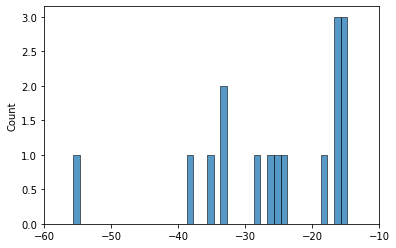

In [13]:
test_noclass = test.drop("class", axis=1)

score_test = gmm.score_samples(test_noclass)
hist_test = sns.histplot(score_test, binwidth=1)
hist_test.set(xlim=(-60, -10))
plt.show()

In [14]:
outliers_test = test.loc[np.where(score_test <= threshold)]
outliers_test.columns = test.columns
outliers_test

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750
3,0,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
12,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
13,1,14.22,1.70,2.30,16.3,118,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970
14,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045
15,1,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
16,1,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515


Znaleźliśmy więc 7 obserwacji, które nasz model uznał za outliery. Znalazło się w nich 5 faktycznych outlierów (czyli wszystkie, co bardzo cieszy) oraz 2 dodatkowe obserwacje, które outlierami nie są.

In [20]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


f1 = f1_score(test.iloc[:,0], score_test < threshold)
prec = precision_score(test.iloc[:,0], score_test < threshold)
rec = recall_score(test.iloc[:,0], score_test < threshold)

print(f'F1 = {round(f1, 3)}, Precision = {round(prec, 3)}, Recall = {round(rec, 3)}')

F1 = 0.833, Precision = 0.714, Recall = 1.0
